<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.888238,83.688443,52.181875,1471.690366,1691.448922,-402.094415,2093.543337
1,0.0,1.0,76.838729,20.782757,74.525497,178.371292,360.518275,228.403656,132.114619
2,0.0,2.0,52.060749,89.778908,35.596292,-2370.553870,-2183.117922,-167.798730,-2015.319192
3,0.0,3.0,99.464239,88.746584,75.758063,-1843.383188,-1569.414301,-802.037058,-767.377244
4,0.0,4.0,80.522315,20.614141,30.524982,-24.428696,117.232741,152.928375,-35.695634
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,66.460852,40.780639,83.410185,768.852364,969.504040,519.221892,450.282148
29996,999.0,26.0,65.606847,48.894231,67.560403,-377.920221,-185.858739,308.267128,-494.125867
29997,999.0,27.0,38.392964,57.129358,37.420900,274.059386,417.002607,-260.209139,677.211746
29998,999.0,28.0,91.538672,56.184607,63.975913,1471.883241,1693.582433,446.477259,1247.105174


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    73.888238  83.688443  52.181875  1471.690366  1691.448922   
      1.0    76.838729  20.782757  74.525497   178.371292   360.518275   
      2.0    52.060749  89.778908  35.596292 -2370.553870 -2183.117922   
      3.0    99.464239  88.746584  75.758063 -1843.383188 -1569.414301   
      4.0    80.522315  20.614141  30.524982   -24.428696   117.232741   
...                ...        ...        ...          ...          ...   
999.0 25.0   66.460852  40.780639  83.410185   768.852364   969.504040   
      26.0   65.606847  48.894231  67.560403  -377.920221  -185.858739   
      27.0   38.392964  57.129358  37.420900   274.059386   417.002607   
      28.0   91.538672  56.184607  63.975913  1471.883241  1693.582433   
      29.0   29.874639  23.705282  44.794232   104.165151   212.539303   

                  y_hat        e_hat  
rep   index                           
0.0   0.0   -402.094415  2093.543337  
      1.0    228.403656   132.114619  
      2.0   -167.798730 -2015.319192  
      3.0   -802.037058  -767.377244  
      4.0    152.928375   -35.695634  
...                 ...          ...  
999.0 25.0   519.221892   450.282148  
      26.0   308.267128  -494.125867  
      27.0  -260.209139   677.211746  
      28.0   446.477259  1247.105174  
      29.0    -3.481253   216.020556  

[30000 rows x 7 columns]

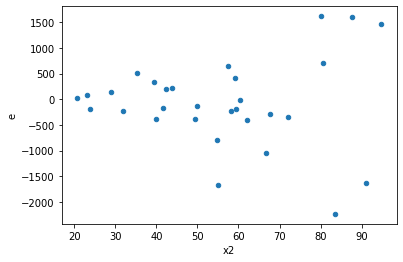

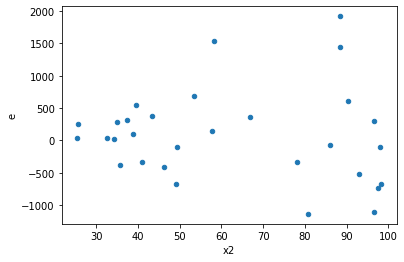

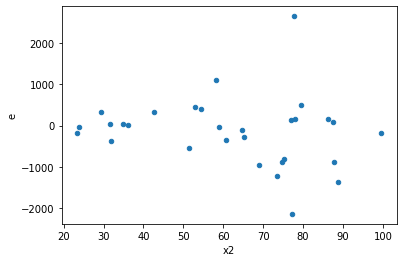

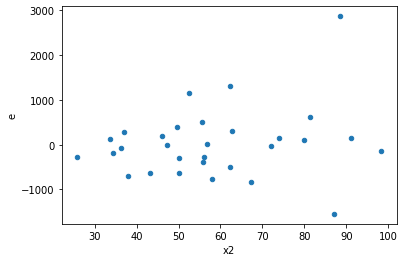

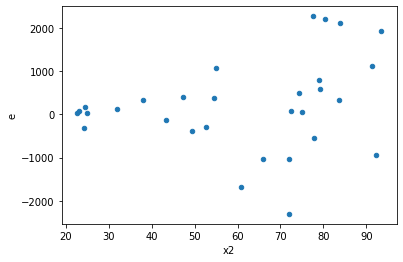

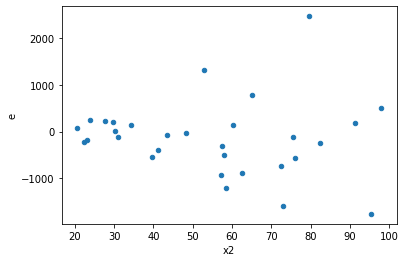

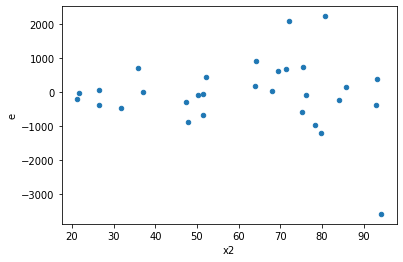

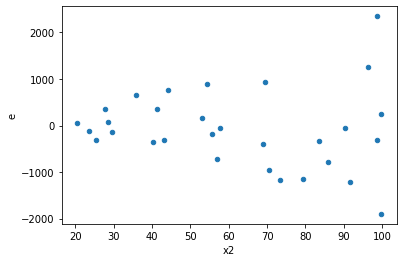

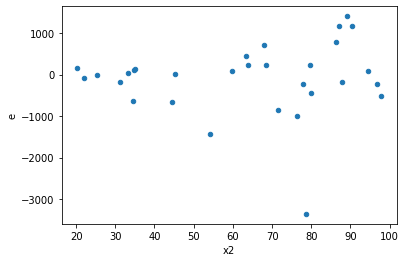

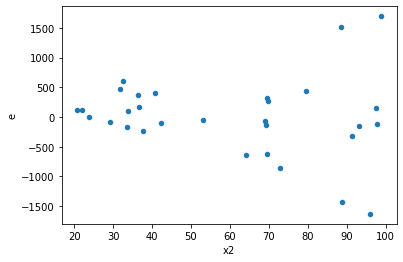

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,15.0,9.0,4505251.241092014,15230860.794665009,300350.0827394676,1692317.86607389,5.634484434425329,0.012786281663810906,0.9936068591680945,0.006393140831905453,Reject005=0 : Heteroscedasticity
5.0,11.0,13.0,6845733.375252337,10932169.09464684,622339.3977502125,840936.084203603,1.3512499566050749,0.5986796135504178,0.7006601932247911,0.2993398067752089,Reject005=1 : Homoscedasticity
14.0,11.0,13.0,9882868.300870402,15373813.941690754,898442.5728064001,1182601.0724377504,1.3162789790155924,0.6299129790711429,0.6850435104644286,0.3149564895355714,Reject005=1 : Homoscedasticity
15.0,14.0,10.0,7229655.44230034,6221617.62804277,516403.96016431,622161.762804277,1.2047966530045913,0.7818874107914775,0.6090562946042613,0.39094370539573875,Reject005=1 : Homoscedasticity
16.0,10.0,14.0,3845671.972566124,20094837.1424167,384567.1972566124,1435345.5101726216,3.7323659438765135,0.025158151179307087,0.9874209244103465,0.012579075589653543,Reject005=0 : Heteroscedasticity
17.0,10.0,14.0,1200361.4758100288,16783123.526383337,120036.14758100288,1198794.5375988097,9.98694611379325,0.00017802329629201807,0.999910988351854,8.901164814600904e-05,Reject005=0 : Heteroscedasticity
21.0,13.0,11.0,3484304.585287882,21881488.529137224,268023.42963752936,1989226.2299215659,7.421837085704649,0.0021079432595645375,0.9989460283702177,0.0010539716297822688,Reject005=0 : Heteroscedasticity
23.0,8.0,16.0,1096617.1202597856,13955677.296695814,137077.1400324732,872229.8310434883,6.363058281175545,0.0017284731295013067,0.9991357634352493,0.0008642365647506534,Reject005=0 : Heteroscedasticity
24.0,10.0,14.0,3980661.76897634,11475949.212335281,398066.176897634,819710.6580239487,2.0592321216849934,0.21049437051354758,0.8947528147432262,0.10524718525677379,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,16939695.61531797,4713060.915434689,1209978.258236998,471306.09154346894,0.38951616554679813,0.1047303055800652,Reject005=1 : Homoscedasticity
1.0,19.0,5.0,3848152.253688175,882264.0457427085,202534.32914148291,176452.8091485417,0.871224201331708,0.7401201153825894,Reject005=1 : Homoscedasticity
2.0,13.0,11.0,3562864.970011021,2295362.7547390084,274066.5361546939,208669.34133990985,0.7613820507518243,0.6325516493494535,Reject005=1 : Homoscedasticity
3.0,16.0,8.0,7932428.396703547,592237.7793049167,495776.7747939717,74029.72241311459,0.1493206744988788,0.0013030207164468695,Reject005=0 : Heteroscedasticity
4.0,15.0,9.0,4505251.241092014,15230860.794665009,300350.0827394676,1692317.86607389,5.634484434425329,0.012786281663810906,Reject005=0 : Heteroscedasticity
5.0,11.0,13.0,6845733.375252337,10932169.09464684,622339.3977502125,840936.084203603,1.3512499566050749,0.5986796135504178,Reject005=1 : Homoscedasticity
6.0,13.0,11.0,9357708.414704388,2781557.2320205583,719823.7242080298,252868.83927459622,0.3512927273309998,0.07648233329805358,Reject005=1 : Homoscedasticity
7.0,14.0,10.0,12124145.44394425,7519882.7251083525,866010.3888531607,751988.2725108352,0.868336318120476,0.787311020988984,Reject005=1 : Homoscedasticity
8.0,12.0,12.0,3844965.8947469816,1939584.0292210293,320413.8245622485,161632.00243508577,0.5044476550158487,0.25013524536583925,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      558
Reject005=0 : Heteroscedasticity    442
Name: Result_test, dtype: int64